In [ ]:
import numpy as np
import pandas as pd
import os
from pandas import read_csv

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/УЛИТКА/Регрессия/')

In [ ]:
df=pd.read_csv('bottle.csv', error_bad_lines=False,sep=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 7888: expected 74 fields, saw 123\n'
b'Skipping line 19285: expected 74 fields, saw 122\n'
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(2)

In [ ]:
df.dtypes

In [ ]:
df = df.dropna(subset=['Depth','Salnty'])

In [ ]:
df.isna().sum()

In [ ]:
dfg = df.dropna(axis = 1, thresh=500000)

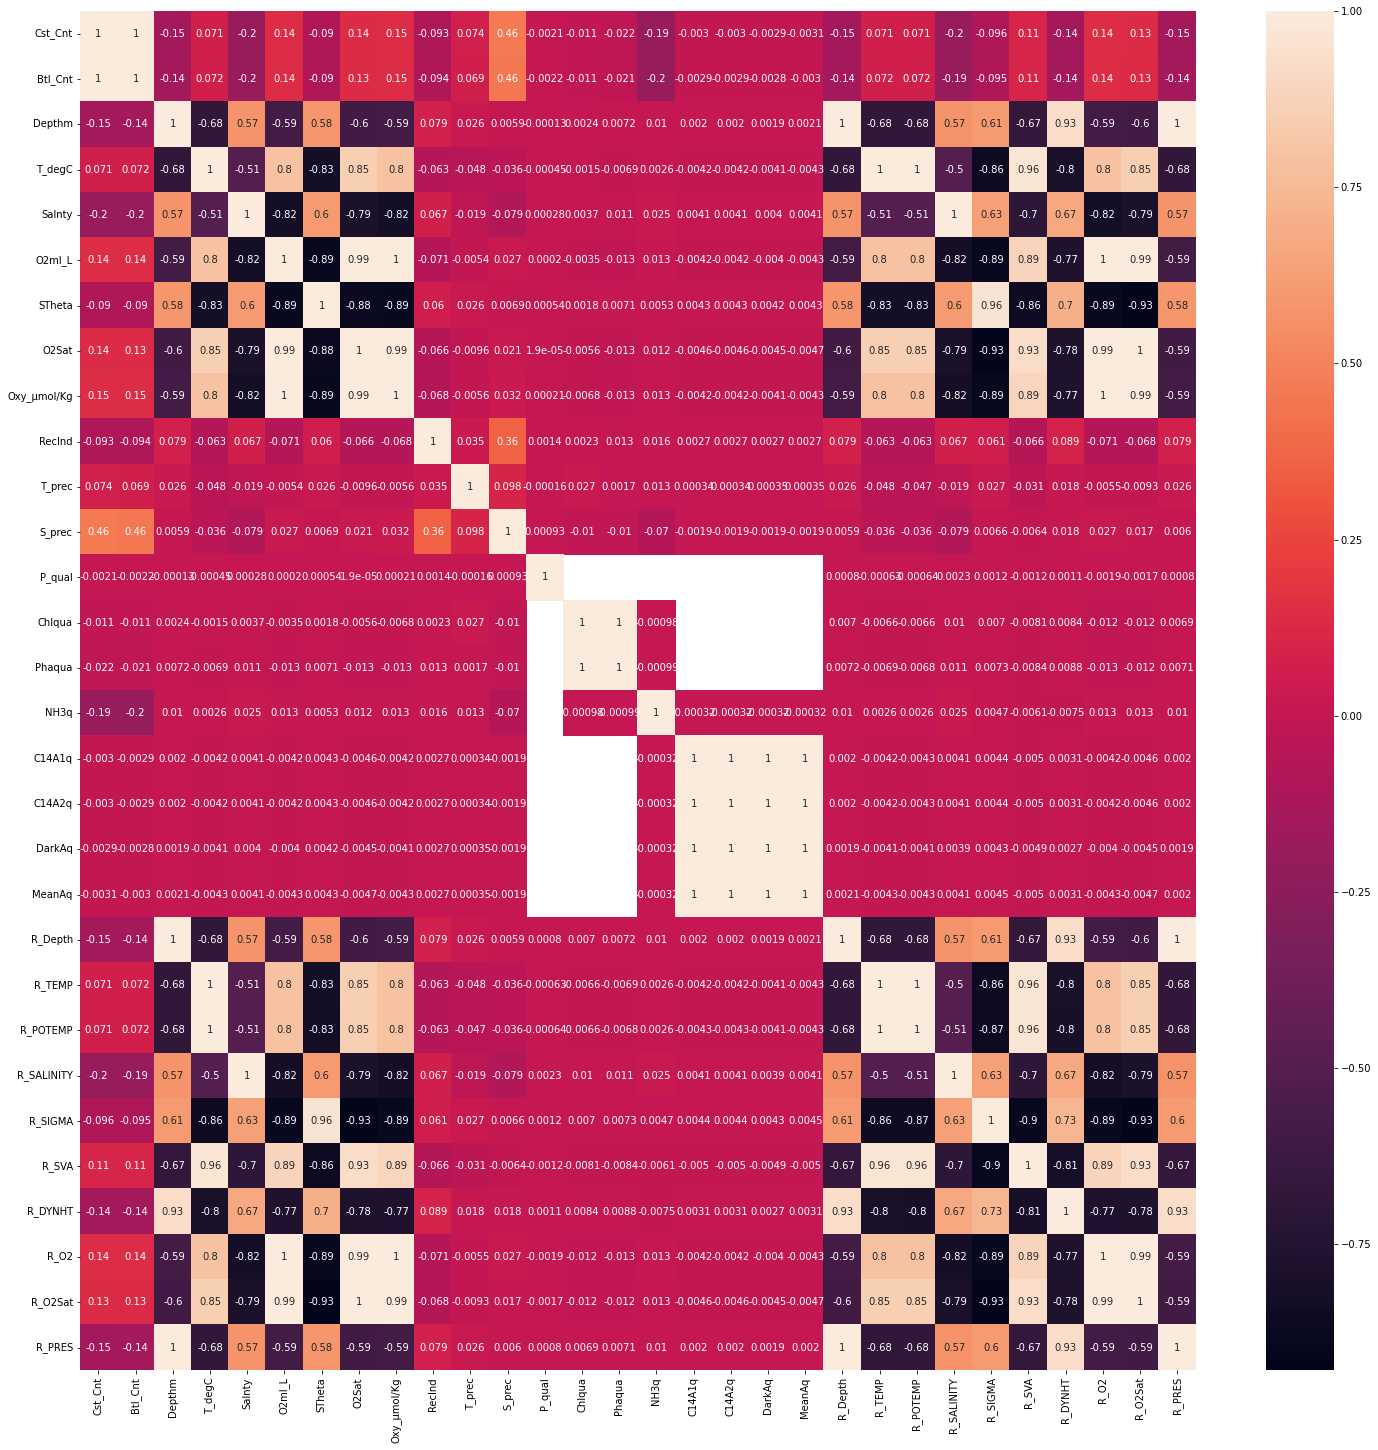

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
hm = sns.heatmap(dfg.corr(), annot = True)

In [ ]:
df1 = df.loc[:,'Sta_ID':'Oxy_µmol/Kg']

In [ ]:
df2 = df.loc[:,'R_Depth':'R_PRES']
df2

In [ ]:
df = pd.concat([df1,df2],axis=1)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.columns

Index(['Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4',
       'R_NO3', 'R_PRES'],
      dtype='object')

In [ ]:
df.drop(['R_NO2','R_NH4', 'R_CHLA','R_PHAEO'],axis=1,inplace=True)

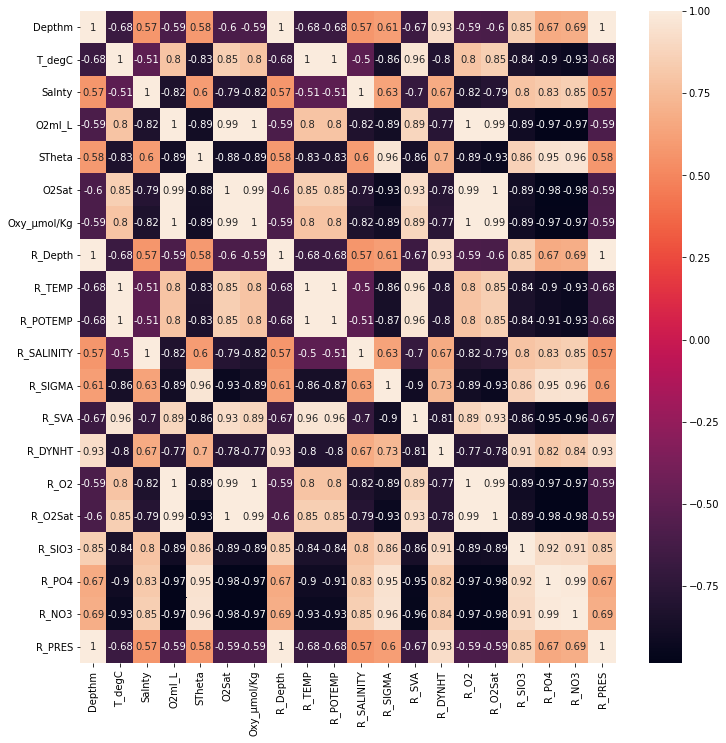

In [ ]:
plt.figure(figsize=(12,12))
hm = sns.heatmap(df.corr(), annot = True)

In [ ]:
df.isna().sum()

In [ ]:
df.shape

(817506, 22)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(817496, 22)

In [ ]:
df.columns

Index(['Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_SIO3',
       'R_PO4'],
      dtype='object')

удаляем дублирующие столбцы

In [ ]:
df.drop(['R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY','R_O2', 'R_O2Sat','R_NO3', 'R_PRES'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(12,10))
hm = sns.heatmap(df.corr(), annot = True)

In [ ]:
df.columns

Index(['Sta_ID', 'Depth_ID', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_SIO3',
       'R_PO4', 'Sta_ID_1', 'Sta_ID_2'],
      dtype='object')

In [ ]:
df.drop(['Sta_ID', 'Depth_ID','Sta_ID_1', 'Sta_ID_2'],axis=1,inplace=True)

In [ ]:
df

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,R_SIGMA,R_SVA,R_DYNHT,R_SIO3,R_PO4
0,0.0,10.500,33.4400,NaN,25.64900,NaN,NaN,25.640,233.0,0.000,NaN,NaN
1,8.0,10.460,33.4400,NaN,25.65600,NaN,NaN,25.650,232.5,0.010,NaN,NaN
2,10.0,10.460,33.4370,NaN,25.65400,NaN,NaN,25.650,232.8,0.020,NaN,NaN
3,19.0,10.450,33.4200,NaN,25.64300,NaN,NaN,25.640,234.1,0.040,NaN,NaN
4,20.0,10.450,33.4210,NaN,25.64300,NaN,NaN,25.640,234.0,0.040,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
864856,0.0,18.744,33.4083,5.805,23.87055,108.74,253.47,23.871,402.4,0.000,1.8,0.22
864857,2.0,18.744,33.4083,5.805,23.87072,108.74,253.47,23.871,402.5,0.008,1.8,0.22
864858,5.0,18.692,33.4150,5.796,23.88911,108.46,253.06,23.889,400.8,0.020,1.8,0.20
864859,10.0,18.161,33.4062,5.816,24.01426,107.74,253.92,24.014,389.1,0.040,2.0,0.25


In [ ]:
df2['Sta_ID_1']=df2['Sta_ID'].str.split(' ').str.get(0).astype(float) # создание столбца с разбиением по пробелу
df2['Sta_ID_2']=df2['Sta_ID'].str.split(' ').str.get(1).astype(float)

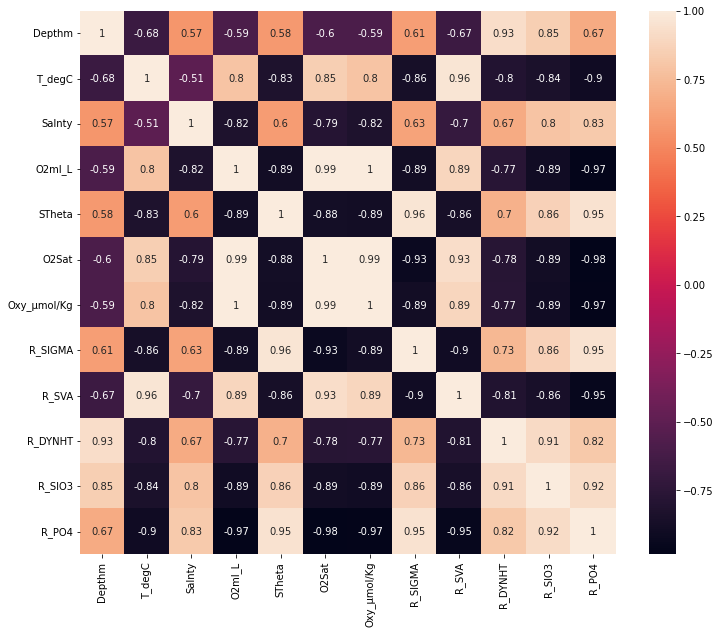

In [ ]:
plt.figure(figsize=(12,10))
hm = sns.heatmap(df.corr(), annot = True)

In [ ]:
df.isna().sum()

Depthm              0
T_degC           3262
Salnty              0
O2ml_L         153314
STheta           5335
O2Sat          156235
Oxy_µmol/Kg    156241
R_SIGMA          5504
R_SVA            5419
R_DYNHT          5913
R_SIO3         468795
R_PO4          423563
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,8))
fi_viz = FeatureImportances(lr2, labels=df.iloc[:,0:13].columns)
fi_viz.fit (X, Y)
fi_viz.poof ()